In Support Vector Machines (SVM), kernels are a fundamental concept used to transform input data into a higher-dimensional feature space. Kernels play a crucial role in SVMs by allowing them to solve complex, nonlinear classification and regression problems.

The primary idea behind using kernels in SVM is to find a hyperplane (decision boundary) that best separates data points in a higher-dimensional space, even if the original data is not linearly separable in its original feature space. Kernels achieve this by implicitly mapping the data into a higher-dimensional space, where linear separation becomes possible. This mapping is performed efficiently, without explicitly computing the transformed feature vectors.

Some commonly used kernels in SVM are:

Linear Kernel: This is the simplest kernel, and it performs a linear transformation of the input data. It is suitable for problems where the data is linearly separable in the original feature space.

Polynomial Kernel: The polynomial kernel maps data into a higher-dimensional space using polynomial functions. It is effective when the decision boundary is nonlinear but can be approximated by a polynomial.

Radial Basis Function (RBF) Kernel: The RBF kernel, also known as the Gaussian kernel, transforms data into an infinite-dimensional space using Gaussian functions. It is suitable for problems with complex, nonlinear decision boundaries.

Sigmoid Kernel: The sigmoid kernel is based on the hyperbolic tangent function and can be used when the data does not exhibit clear linear or polynomial separability.

# Let us create a non-linearly seperable dataset.


Make a large circle containing a smaller circle in 2d.

A simple toy dataset to visualize clustering and classification
algorithms.

In [4]:
from sklearn.datasets import make_circles

In [5]:
X, y = make_circles(100, factor=.1, noise=.1)

In [6]:
import matplotlib.pyplot as plt

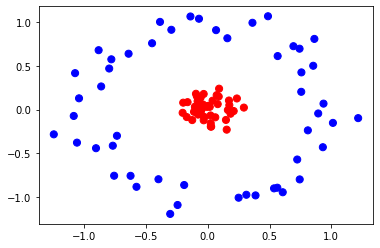

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

Clearly this is a non-linearly seperable dataset, so by using linear kernel this should give a very less accuracy (performance metric)

# Making a SVC model for this data with linear kernel to see the performance

Splitting the data into train and test split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Importing support vector classifier

In [10]:
from sklearn.svm import SVC

Creating a linear SVC model

In [12]:
classifier = SVC(kernel='linear')
classifier

SVC(kernel='linear')

Training the model using the trainig data

In [13]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

Making predictions for the test data

In [14]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [15]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

Let us see the accuracy of the model

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7

Which is a bad accuracy

Let us see the actual decision boundary with the dataset to visualize things

Using ListedColormap

In [24]:
from matplotlib.colors import ListedColormap

import numpy as np

In [25]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


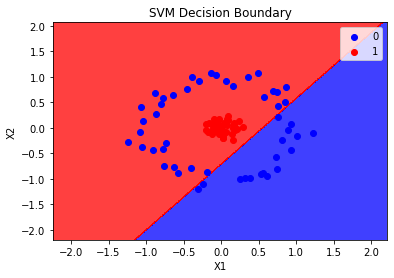

In [26]:
plot_decision_boundary(X, y, classifier)

We can cleary see the line could not seperate the blue dots to the left of it causing low accuracy of the model.

# Using RBF (Radial Basis Function) Kernel

Firstly let us visualise what the RBF Kernel transformation will look like

which is using the exponential function below exp(-(X ** 2).sum(1)) to make the z axis.

So a 2D problem becomes a 3D problem.

In [28]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3DSubplot:xlabel='X1', ylabel='X2'>

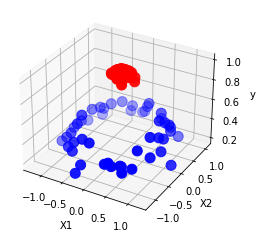

In [29]:
plot_3d_plot(X,y)

So we can see now the data looks quite seperable.

This could have been done automatically by the algorithm if we just train it by giving the hyper parameter kernel = 'rbf'

Let us see that model

In [30]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

1.0

So for the same training and test dataset this works like a magic and the algorithm accuracy reaches straight to 100%

Let us plot its decision boundary

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


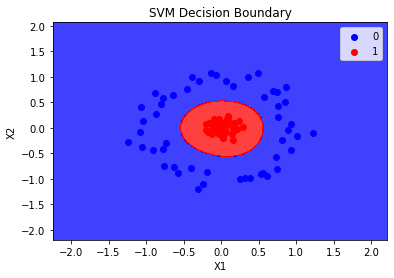

In [33]:
plot_decision_boundary(X, y, rbf_classifier)

We can see the decision boundary easily divides data points in a well manner

# Using Polynomial kernel

Using a polynomial kernel of degree 2

In [34]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


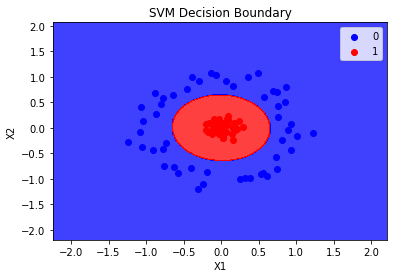

In [37]:
plot_decision_boundary(X, y, poly_classifier)

Polynomial classifier is also able to classify the data well with 100% accuracy.

The hyperparameter degree can be chosen by using cross validation techniques such as GridSearchCV

# Hyperparameter Tuning

Let us do cross validation to see what degree works best. (hyper parameter tuning)

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
poly_classifier = SVC()

Setting parameter grid to choose the parameters:

In [69]:
param_grid = {"degree" : [1,2,3,4,5,6]}

In [70]:
CV = GridSearchCV(poly_classifier, param_grid, cv = 5)

Applying the cross validation onto the training datasets

In [71]:
CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'degree': [1, 2, 3, 4, 5, 6]})

In [80]:
CV.best_params_

{'kernel': 'rbf'}

Hence, the model is giving the best estimator as degree = 1

In [73]:
y_pred = CV.predict(X_test)

In [74]:
accuracy_score(y_test, y_pred)

1.0

So here we are able to get 100% accuracy.

Let us add kernel also so we get to know which kernel to use as a hyperparameter

In [77]:
param_grid = {"kernel" : ['linear', 'rbf', 'poly', 'sigmoid']}
classifier = SVC()
CV = GridSearchCV(classifier, param_grid, cv = 5)
CV.fit(X_train, y_train)
best_kernel = CV.best_params_['kernel']

In [78]:
best_kernel

'rbf'